### Task 4- IPL EDA  
   <i>- Sawan Shivanand Beli</i>

### Problem statement :
- As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Reading Data

In [2]:
stats_df=pd.read_csv(r'deliveries.csv')
matches_df=pd.read_csv('matches.csv')

In [3]:
stats_df.shape

(179078, 21)

In [4]:
stats_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches_df.shape

(756, 18)

In [6]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


We have two datasets here stats_df has ball to ball information about every match from the starting of IPL and the second dataset matches_df contains information about the matches from the start of the IPL.

In [7]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
matches_df.date = pd.to_datetime(matches_df['date'])

In [10]:
stats_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [11]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
stats_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

As player dismissed, dismissal kind and fielder values are only present when there was a wicket, the null values are self explainable.

In [13]:
matches_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
matches_df[matches_df.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


Winner is null values for those values where the matches were stopped either because of rain or some techincal issue and there was no result.

In [15]:
stats_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

Merging both the datasets to one

In [16]:
df=pd.merge(stats_df,matches_df,how="left",left_on='match_id',right_on='id',left_index=False,right_index=False)

In [17]:
df.shape

(179078, 39)

In [18]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [19]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [20]:
df=df.drop(['team2', 'id', 'venue', 'umpire1', 'umpire2', 'umpire3', 'penalty_runs'],axis=1)

## Season Wise Stats

In [21]:
season = df['season'].unique()
season.sort()
print(season)

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


### Season Winners

In [22]:
winners = []
for i in season:
    winners.append(matches_df[matches_df.season == i].iloc[-1:,-8].values[0])

In [23]:
season_winners = pd.DataFrame({'Season': season, 'Winners': winners})

In [24]:
season_winners

,Season,Winners
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


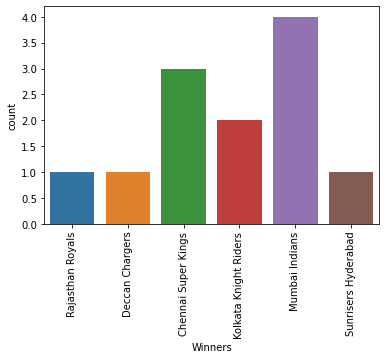

In [25]:
sns.countplot(season_winners.Winners)
plt.xticks(rotation = 90)
plt.show()

Mumbai Indians have won most of the Seasons. So Mumbai Indians can be named as the most successful team.

### Orange Cap Holders

In [26]:
for i in season:
    print('Season: ', i)
    print(df[df.season == i].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(1))

Season:  2008
batsman
SE Marsh    616
Name: batsman_runs, dtype: int64
Season:  2009
batsman
ML Hayden    572
Name: batsman_runs, dtype: int64
Season:  2010
batsman
SR Tendulkar    618
Name: batsman_runs, dtype: int64
Season:  2011
batsman
CH Gayle    608
Name: batsman_runs, dtype: int64
Season:  2012
batsman
CH Gayle    733
Name: batsman_runs, dtype: int64
Season:  2013
batsman
MEK Hussey    733
Name: batsman_runs, dtype: int64
Season:  2014
batsman
RV Uthappa    660
Name: batsman_runs, dtype: int64
Season:  2015
batsman
DA Warner    562
Name: batsman_runs, dtype: int64
Season:  2016
batsman
V Kohli    973
Name: batsman_runs, dtype: int64
Season:  2017
batsman
DA Warner    641
Name: batsman_runs, dtype: int64
Season:  2018
batsman
KS Williamson    747
Name: batsman_runs, dtype: int64
Season:  2019
batsman
DA Warner    727
Name: batsman_runs, dtype: int64


### Most Runs Scored (all time)

In [27]:
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

### Most 6s (all time)

In [28]:
df[df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head()

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman_runs, dtype: int64

Most number of sixes has been hit by Chris Gayle.

### Most 4s (all time)

In [29]:
df[df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head()

batsman
S Dhawan     526
SK Raina     495
G Gambhir    492
V Kohli      482
DA Warner    459
Name: batsman_runs, dtype: int64

Dhawan has the most number of fours in all the season.

### S/R in the death overs (all time)

In [30]:
df[df['over']>=15].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10) / (df[df['over']>=15].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10))*100

batsman
AB de Villiers    206.227106
AT Rayudu         156.258597
KA Pollard        160.119556
KD Karthik        155.135773
MS Dhoni          163.439153
RA Jadeja         131.712963
RG Sharma         171.045062
V Kohli           175.891759
YK Pathan         147.240618
Yuvraj Singh      160.593220
Name: batsman_runs, dtype: float64

Here you can see that ABD has the highest strike rate in the last 5 overs, which are very crucial overs for the match and people like him for this.

### Purple Cap Holders

In [31]:
df['player_dismissed'] = df['player_dismissed'].fillna(0)

In [32]:
df['wickets'] = df[df.dismissal_kind != 'run out']['player_dismissed'].apply(lambda x: 1 if x != 0 else x)

In [33]:
for i in season:
    print('Season: ', i)
    print(df[(df.season == i)].groupby('bowler')['wickets'].sum().sort_values(ascending = False).head(1))

Season:  2008
bowler
Sohail Tanvir    22.0
Name: wickets, dtype: float64
Season:  2009
bowler
RP Singh    23.0
Name: wickets, dtype: float64
Season:  2010
bowler
PP Ojha    21.0
Name: wickets, dtype: float64
Season:  2011
bowler
SL Malinga    28.0
Name: wickets, dtype: float64
Season:  2012
bowler
M Morkel    25.0
Name: wickets, dtype: float64
Season:  2013
bowler
DJ Bravo    32.0
Name: wickets, dtype: float64
Season:  2014
bowler
MM Sharma    23.0
Name: wickets, dtype: float64
Season:  2015
bowler
DJ Bravo    26.0
Name: wickets, dtype: float64
Season:  2016
bowler
B Kumar    23.0
Name: wickets, dtype: float64
Season:  2017
bowler
B Kumar    26.0
Name: wickets, dtype: float64
Season:  2018
bowler
AJ Tye    24.0
Name: wickets, dtype: float64
Season:  2019
bowler
Imran Tahir    26.0
Name: wickets, dtype: float64


### Most Wickets (all time)

In [34]:
df.groupby('bowler')['wickets'].sum().sort_values(ascending = False).head(10)

bowler
SL Malinga         170.0
A Mishra           156.0
Harbhajan Singh    150.0
PP Chawla          149.0
DJ Bravo           147.0
B Kumar            133.0
R Ashwin           125.0
SP Narine          122.0
UT Yadav           119.0
RA Jadeja          108.0
Name: wickets, dtype: float64

### Best Bowling Figure (all time)

In [35]:
df.groupby(['match_id', 'bowler'])['wickets', 'total_runs'].sum().sort_values(by = 'wickets', ascending = False).head(10)

,,wickets,total_runs
match_id,bowler,,
83,Sohail Tanvir,6.0,15
616,A Zampa,6.0,19
11310,A Joseph,6.0,18
313,RA Jadeja,5.0,16
13,AJ Tye,5.0,18
321,AD Mascarenhas,5.0,29
449,JP Faulkner,5.0,18
438,JD Unadkat,5.0,25
238,SL Malinga,5.0,13


Sohail Tanvir had the best bowling figure where he took 6 wickets and gave only 15 runs.

### Home vs Away

In [36]:
df['home'] = np.where(df['team1'] == df['winner'], 1, 0)

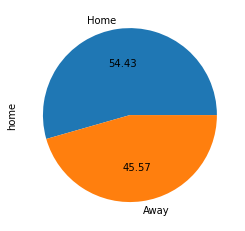

In [37]:
df.home.value_counts(normalize = True).plot(kind = 'pie', autopct = '%.2f', labels = ['Home', 'Away'])
plt.show()

There is no significant change depending on the home ground.

### Toss Winner and Match Winner

In [38]:
df['toss_factor'] = np.where(df['toss_winner'] == df['winner'], 1, 0)

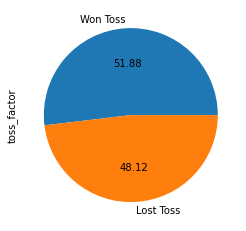

In [39]:
df.toss_factor.value_counts().plot(kind='pie', autopct = '%.2f', labels = ['Won Toss', 'Lost Toss'])
plt.show()

### Field vs Bat

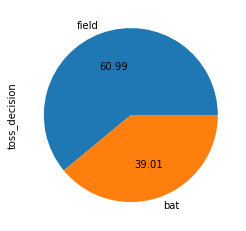

In [40]:
df.toss_decision.value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.show()

In [41]:
df[(df.toss_decision == 'field') & (df.toss_winner == df.winner)].shape[0] / df[df.toss_decision == 'field'].shape[0]

0.5503469996887074

In [42]:
df[(df.toss_decision == 'bat') & (df.toss_winner == df.winner)].shape[0] / df[df.toss_decision == 'bat'].shape[0]

0.46959459459459457

Here you can see that people have won more when they have won the toss and chose to field. In other words most number of teams have chased the targert to win the match.

###### Observations:
- Mumbai Indians is the most successful team in the IPL.
- Chris Gayle, AB de Villiers and Virat Kholi are the most popular and successful batsman.
- Malinga, B Kumar are the successful bowlers.
- Many matches were won by chasing the total after winnin the toss.
- Toss and Home ground were not that effective as factors contributing to win or loss of a team.

###### Inference:
- Mumbai Indians as it is the most successful team.
- Royal Challengers Bangalore because most of the successfull or popular players are from that team.
- PLayers like V Kholi, ABD, Gayle would be best suited for endorsments of the products.
